In [192]:
import re
import pandas as pd
sys.path.append('../')
import src.limpieza as lmp
import numpy as np

In [193]:
pd.options.display.max_columns = None

In [194]:
revius = open("output1.html", "r", encoding='utf-8').readlines()

In [196]:
civitatis = [' '.join(str(i) for i in revius)]

In [197]:
print(len(civitatis))

1


In [198]:
corte = '\ue9ce\ue9ce\ue9ce\ue9ce\ue9ce\n'
civitatis_ = civitatis[0].split(corte)

In [199]:
civitatis_revius = [i for i in civitatis_[2::2]]

In [200]:
civitatis_revius_limpio = [i.split('\n') for i in civitatis_revius]

In [201]:
longitud = [len(i) for i in civitatis_revius_limpio]
long_ = set(longitud)
print(long_)

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13}


In [202]:
for i in range(0,14):
    for a in civitatis_revius_limpio:
        if len(a)==i:
            print(a)
            break

[' 11 / Mar / 2022', ' A', ' Anónimo', ' ']
[' 10 / Mar / 2022', ' D', ' Diana Cruz Torres', ' Toa Alta, Puerto Rico', ' ']
[' 11 / Mar / 2022', ' A', ' Ainhoa', ' España', ' Viajó en pareja', ' ']
[' 11 / Mar / 2022', ' A', ' Ana', ' Madrid, España', ' Victor es encantador, te explica todo al detalle y te resuelve todas las preguntas, volvería a repetir, me a encantado.', ' Viajó con hijos mayores', ' ']
[' 11 / Mar / 2022', ' G', ' Graciela Arguelles', ' Guanajuato, Montenegro', ' Excelente recorrido ️️️️️', ' Opinión traducida. Mostrar en idioma original', ' Viajó con amigos', ' ']
[' 08 / Mar / 2022', ' A', ' Anónimo', ' 16195 opiniones', ' Mostrando 37-48', ' primera anterior', ' Página 2 Página 3 Página 4 Página 5 Página 6', ' siguiente última', ' ']
[' 10 / Feb / 2022', ' A', ' Anónimo', ' Viajó solo', ' 16195 opiniones', ' Mostrando 469-480', ' primera anterior', ' Página 38 Página 39 Página 40 Página 41 Página 42', ' siguiente última', ' ']
[' 11 / Mar / 2022', ' M', ' María J

In [203]:
civitatis_limpio_oi = lmp.pulir(civitatis_revius_limpio)
civitatis_reluciente = lmp.quitar_respuestas(civitatis_limpio_oi)


In [204]:
longitud = [len(i) for i in civitatis_reluciente]
long_ = set(longitud)
print(long_)

{2, 3, 4, 5}


In [205]:
len(civitatis_reluciente)

16231

In [206]:
dict_revius = lmp.dict_civitatis_completo(civitatis_reluciente)

In [207]:
len(dict_revius['fecha']) == len(dict_revius['nombre']) == len(dict_revius['procedencia']) == len(dict_revius['opinion']) == len(dict_revius['viajo_con'])

True

In [208]:
df_civitatis = pd.DataFrame(dict_revius)

In [209]:
df_civitatis.head(5)

,fecha,nombre,procedencia,opinion,viajo_con
0,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores
1,11 / Mar / 2022,Montserrat,España,"Casi 3 horas de tour pero Víctor, el guía que...",Viajó solo
2,11 / Mar / 2022,Ainhoa,España,,Viajó en pareja
3,11 / Mar / 2022,Patricia Suárez Carrillo,"Madrid, España",A mi pareja y a mi nos ha encantado! Nuestro ...,Viajó en pareja
4,11 / Mar / 2022,Anónimo,,,


In [210]:
df_civitatis.shape

(16231, 5)

In [211]:
df_civitatis.duplicated().sum()

4690

We can se that we have quite a lot of duplicates, actually around 29% of the rows seem to be replicated but, is this completely truth?

In [212]:
df_civitatis[df_civitatis.duplicated() == True]

,fecha,nombre,procedencia,opinion,viajo_con
12,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores
13,11 / Mar / 2022,Montserrat,España,"Casi 3 horas de tour pero Víctor, el guía que...",Viajó solo
14,11 / Mar / 2022,Ainhoa,España,,Viajó en pareja
15,11 / Mar / 2022,Patricia Suárez Carrillo,"Madrid, España",A mi pareja y a mi nos ha encantado! Nuestro ...,Viajó en pareja
16,11 / Mar / 2022,Anónimo,,,
...,...,...,...,...,...
16177,04 / May / 2019,Anónimo,España,,
16190,06 / Mar / 2019,Anónimo,España,,
16196,15 / Feb / 2019,Anónimo,España,,
16198,08 / Feb / 2019,Anónimo,España,,


In [213]:
df_civitatis.iloc[13,3]

' Casi 3 horas de tour pero Víctor, el guía que nos ha acompañado ha sido un encanto. Hemos andado muchísimo pero ha merecido la pena porque se nota que le gusta mucho su trabajo y se ha hecho muy ameno y emocionante. Sin duda un tour 100% recomendado con este guía. Gracias por hacernos pasar una mañana increíble.'

In [214]:
df_civitatis[df_civitatis['opinion'] == 'Casi 3 horas de tour pero Víctor, el guía que nos ha acompañado ha sido un encanto. Hemos andado muchísimo pero ha merecido la pena porque se nota que le gusta mucho su trabajo y se ha hecho muy ameno y emocionante. Sin duda un tour 100% recomendado con este guía. Gracias por hacernos pasar una mañana increíble.']


,fecha,nombre,procedencia,opinion,viajo_con


We can be absolutely sure that the we have doubled values only if we check the column 'opinion', as it's the only one unrepeatable. On the other hand, we can easely have several people from Spain doing a tour the same day who wouldn't leave their names, so all of them will appear as 'Anonimo' and 'España' with the other columns in blank, and pandas will take them as duplicates while they actually were different clients.
So let's analize this in two different data frames. First let's take the revius with the 'opinion' column filled.

In [215]:
dict_revius_5 = lmp.dict_civitatis_5(civitatis_reluciente)

In [216]:
df_civitatis_5 = pd.DataFrame(dict_revius_5)

In [217]:
df_civitatis_5.shape

(8953, 5)

In [218]:
df_civitatis_5.head(5)

,fecha,nombre,procedencia,opinion,viajo_con
0,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores
1,11 / Mar / 2022,Montserrat,España,"Casi 3 horas de tour pero Víctor, el guía que...",Viajó solo
2,11 / Mar / 2022,Patricia Suárez Carrillo,"Madrid, España",A mi pareja y a mi nos ha encantado! Nuestro ...,Viajó en pareja
3,11 / Mar / 2022,Saray,"Alicante, España","El guia del tour, Ponce, Genial.",Viajó con amigos
4,11 / Mar / 2022,Tania Carrera Garcia,España,"Mónica ha sido una guía genial, nos ha explic...",Viajó con amigos


In [219]:
df_civitatis_5.duplicated().sum()

2114

In [220]:
df_civitatis_5[df_civitatis_5.duplicated() == True]

,fecha,nombre,procedencia,opinion,viajo_con
9,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores
10,11 / Mar / 2022,Montserrat,España,"Casi 3 horas de tour pero Víctor, el guía que...",Viajó solo
11,11 / Mar / 2022,Patricia Suárez Carrillo,"Madrid, España",A mi pareja y a mi nos ha encantado! Nuestro ...,Viajó en pareja
12,11 / Mar / 2022,Saray,"Alicante, España","El guia del tour, Ponce, Genial.",Viajó con amigos
13,11 / Mar / 2022,Tania Carrera Garcia,España,"Mónica ha sido una guía genial, nos ha explic...",Viajó con amigos
...,...,...,...,...,...
8836,15 / Jun / 2017,Pablo,"Buenos Aires, Argentina",Excelente paseo y pablo nuestro guia fantastico,Viajó en pareja
8837,15 / Jun / 2017,Sofia Hernandez,"Guatemala, Guatemala","Me gusto mucho, amable y dispuesto a contesta...",Viajó en pareja
8838,15 / Jun / 2017,Luis,"Madrid, España",Una guía agradable de unas dos horas en las q...,Viajó con hijos mayores
8839,11 / Jun / 2017,Maria,"Madrid, España","Nos ha encantado, muy amena y Pablo el guía s...",Viajó en pareja


In [221]:
df_civitatis_5.iloc[0, 3]

' Victor es encantador, te explica todo al detalle y te resuelve todas las preguntas, volvería a repetir, me a encantado.'

In [222]:
df_civitatis_5[df_civitatis_5['opinion'] == ' Victor es encantador, te explica todo al detalle y te resuelve todas las preguntas, volvería a repetir, me a encantado.']

,fecha,nombre,procedencia,opinion,viajo_con
0,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores
9,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores
26,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores


And here we can see that that some reviews are repeated up to three times... 
Anyway, from the total number of rows, 8953, this means that 23,6% of them are duplicated, a value significantly lower than the 29% we got for whole data frame.
Now let's drop the duplicates in this one and then we will work with the reviews that don't have the 'opinion' column filled.

In [223]:
df_civitatis_5 = df_civitatis_5.drop_duplicates()
df_civitatis_5.duplicated().sum()

0

In [224]:
df_civitatis_5[df_civitatis_5['opinion'] == ' Victor es encantador, te explica todo al detalle y te resuelve todas las preguntas, volvería a repetir, me a encantado.']

,fecha,nombre,procedencia,opinion,viajo_con
0,11 / Mar / 2022,Ana,"Madrid, España","Victor es encantador, te explica todo al deta...",Viajó con hijos mayores


All the reviews whithout 'opinion':

In [225]:
dict_civitatis_2_4 = lmp.dict_civitatis_2_4(civitatis_reluciente)

In [226]:
df_civitatis_2_4 = pd.DataFrame(dict_civitatis_2_4)

In [227]:
df_civitatis_2_4.shape

(7278, 5)

In [228]:
df_civitatis_2_4.head(5)

,fecha,nombre,procedencia,opinion,viajo_con
0,11 / Mar / 2022,Ainhoa,España,,Viajó en pareja
1,11 / Mar / 2022,Anónimo,,,
2,11 / Mar / 2022,María José Campillo Mateo,"Murcia, España",,Viajó en pareja
3,11 / Mar / 2022,Ainhoa,España,,Viajó en pareja
4,11 / Mar / 2022,Anónimo,,,


In [229]:
df_civitatis_2_4.duplicated().sum()

2576

If we take the reviews without 'opinion', we can see that the number of duplicates is signifincantly higher, around a 35%. This is due to the fact commented above that there can easely be two different clients with the same name (or name and origin) the same day.
Taking this into account, we won't drop all the duplicates, as this will alter significantly the data and we will be earasing real tourist from our data frame. But as we cannot state for sure which rows are duplicates and which ones are not, we will ramdomly erase 23% of them, as this seems to be the real percentage of duplicates that the algorithm generates; this means that we are going to drop 1717 rows in stead of the 2576 that pandas duplicated() method proposes.

In [230]:
df_civitatis_2_4 = lmp.drop_tourist(df_civitatis_2_4)

And we check that 23.6% of the rows are gone

In [231]:
df_civitatis_2_4.shape

(5561, 5)

Now that we have both datesets cleaned of duplicates, we can concatenate them

In [232]:
pd_civitatis = pd.concat([df_civitatis_5, df_civitatis_2_4])

In [233]:
pd_civitatis.shape

(12400, 5)

Above we verify that 23.6% of the rows are gone. From 16231 at the begining, now we have 12400.

Time to clean the data

In [234]:
pd_civitatis.sample(5)

,fecha,nombre,procedencia,opinion,viajo_con
4120,17 / Dic / 2019,Juan Luis,"Monterrey, México",Pedro muy amena la informacion.. altamente re...,Viajó con hijos pequeños
1974,05 / Ago / 2021,Elisa,"Segovia, España",,Viajó con hijos mayores
4550,10 / Jul / 2019,Yael,"Santiago, Chile",,Viajó solo
5713,05 / Feb / 2019,Melina,"Buenos Aires, Argentina",,Viajó con hijos mayores
7867,10 / Sep / 2018,Emiliano Gabriel Terraza Nicosia,"Toulouse, Francia","Laura fue una excelente guía; entusiasmo, sim...",Viajó en pareja


First, we will take away the spaces at the begining and end of the values

In [235]:
df_civitatis = lmp.values_sin_espacios(df_civitatis)

Now we will deal with the dates ('fecha' column), so they will be in date-time format, as this will be the main criteria we will use to organize the tourist

In [236]:
df_civitatis.iloc[0,0]

'11 / Mar / 2022'

In [237]:
df_civitatis = lmp.date_time(df_civitatis)

In [238]:
df_civitatis.iloc[0,0]

Timestamp('2022-03-11 00:00:00')

In [239]:
df_civitatis.sort_values(by=['fecha']).head(5)

,fecha,nombre,procedencia,opinion,viajo_con
15955,2017-06-09,Charo,"Salamancs, España",,Viajó en pareja
15947,2017-06-09,Charo,"Salamancs, España",,Viajó en pareja
15954,2017-06-11,Maria,"Madrid, España","Nos ha encantado, muy amena y Pablo el guía su...",Viajó en pareja
15946,2017-06-11,Maria,"Madrid, España","Nos ha encantado, muy amena y Pablo el guía su...",Viajó en pareja
15952,2017-06-15,Sofia Hernandez,"Guatemala, Guatemala","Me gusto mucho, amable y dispuesto a contestar...",Viajó en pareja


In [240]:
df = df_civitatis.set_index('fecha')

In [241]:
gb = df.groupby([(df.index.year),(df.index.month)]).count()

In [242]:
gb.tail(5)

nombre  procedencia  opinion  viajo_con
fecha fecha                                         
2021  11        553          553      553        553
      12        678          678      678        678
2022  1         386          386      386        386
      2         470          470      470        470
      3         203          203      203        203

In [243]:
gb_1 = gb.drop(['procedencia', 'opinion', 'viajo_con'], axis=1)

In [244]:
gb_1=gb_1.rename(columns={'nombre':'numero_turistas'})

In [245]:
gb_1.head(5)

numero_turistas
fecha fecha                 
2017  6                   19
      7                   26
      8                   82
      9                   58
      10                  34

<AxesSubplot:xlabel='fecha,fecha'>

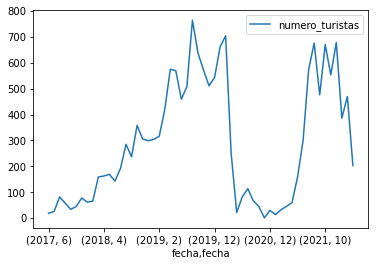

In [246]:
gb_1.plot()

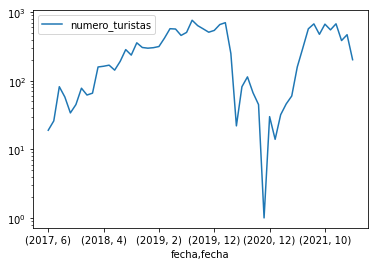

In [247]:
gb_1.plot()
plt.yscale('log')

In [248]:
import matplotlib.pyplot as plt

In [250]:
import seaborn as sns

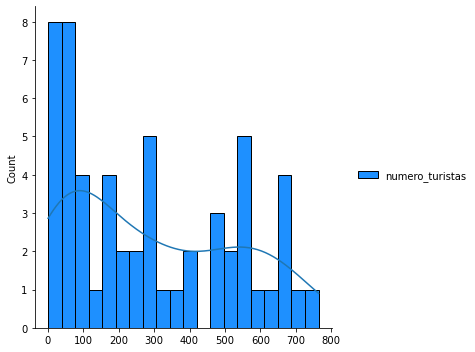

In [251]:
sns.displot(gb_1,
            facecolor='dodgerblue', # poner el color de relleno
            edgecolor = "black", # poner el color de la línea 
            bins=20, 
            color= "black" ,# para cambiar el color de la línea del kde
            kde=True); # para trazar una línea de densidad